In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x,y=make_blobs(n_samples=800,centers=5,n_features=3)

In [3]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [4]:
ss.fit_transform(x,y)

array([[-0.76095179, -0.92323187,  0.19895742],
       [-1.04755067,  0.99271057, -1.41274696],
       [ 0.09958233,  0.66998802,  0.19001039],
       ...,
       [-0.78020815, -0.89887033,  0.51298675],
       [-0.5889991 , -0.97150923,  0.40567415],
       [-0.75749339, -1.02624945,  0.33532619]])

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
y_test

array([4, 3, 1, 0, 2, 4, 4, 3, 0, 0, 2, 4, 0, 0, 1, 3, 4, 3, 2, 2, 3, 1,
       3, 3, 2, 0, 3, 1, 4, 1, 4, 3, 3, 0, 0, 2, 3, 0, 1, 1, 4, 1, 3, 1,
       2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 3, 3, 3, 1, 2, 0, 0, 0, 4, 2, 4, 1,
       1, 0, 4, 3, 1, 4, 1, 0, 1, 0, 3, 3, 3, 3, 4, 0, 2, 1, 0, 1, 3, 4,
       2, 1, 0, 2, 3, 4, 0, 0, 1, 2, 0, 2, 3, 0, 4, 2, 1, 2, 2, 0, 2, 2,
       0, 4, 1, 2, 4, 3, 3, 4, 2, 0, 1, 1, 4, 3, 0, 0, 3, 1, 3, 4, 4, 3,
       1, 4, 4, 1, 4, 0, 1, 4, 4, 3, 2, 1, 0, 1, 1, 4, 2, 4, 1, 4, 2, 0,
       4, 1, 1, 0, 1, 0])

In [7]:
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.transform(x_test)

In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)

In [9]:
kmeans.fit_transform(x_train_ss)

array([[2.45164085, 1.93099268, 1.03781465, 3.50885169, 0.09155528],
       [2.53580999, 2.34657605, 0.20799344, 3.68239668, 1.13228024],
       [2.20067754, 0.1835038 , 2.21396075, 2.11247162, 1.86605759],
       ...,
       [3.87008258, 1.9247169 , 3.23111787, 0.27145667, 3.25712244],
       [2.902897  , 2.61438021, 0.50095755, 3.69101158, 1.54885311],
       [4.0629761 , 2.12150435, 3.58607044, 0.14107565, 3.57260783]])

In [10]:
kmeans_fit=kmeans.fit(x_train_ss)

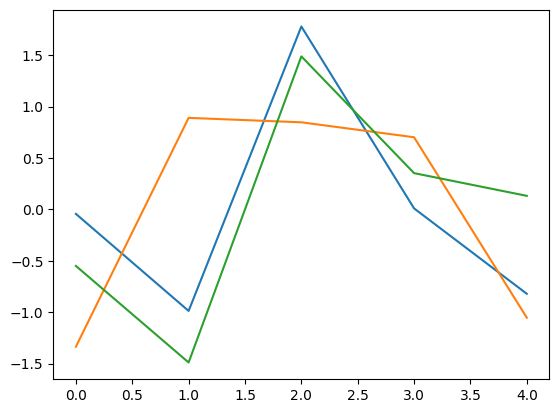

In [11]:
plt.plot(kmeans_fit.cluster_centers_)

In [12]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x_train_ss)
  wcss.append(kmeans.inertia_)

In [13]:
wcss

[1919.9999999999984,
 1198.6309990897628,
 406.34621172406895,
 323.1527215450854,
 47.000288956770696,
 44.411303727048434,
 41.616442693381124,
 39.51856000075604,
 36.941386537975944,
 36.94901266362067]

Text(0.5, 1.0, 'Elbow Curve')

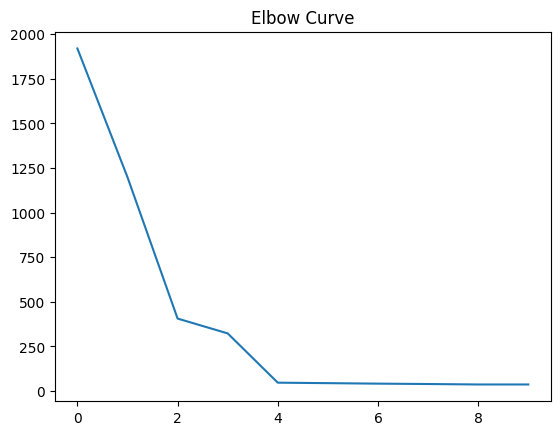

In [14]:
plt.plot(wcss)
plt.title("Elbow Curve")

In [24]:
kx_pred=kmeans.predict(x_train_ss)

In [25]:
kx_pred

array([4, 2, 1, 2, 6, 3, 1, 4, 7, 8, 9, 4, 0, 1, 5, 0, 4, 3, 4, 6, 5, 4,
       1, 1, 4, 9, 4, 9, 6, 1, 3, 4, 4, 4, 1, 4, 6, 1, 6, 2, 6, 3, 4, 6,
       4, 1, 5, 1, 8, 1, 1, 6, 0, 0, 6, 4, 1, 0, 6, 5, 3, 1, 1, 0, 2, 6,
       1, 5, 6, 3, 7, 7, 8, 4, 9, 3, 6, 7, 2, 1, 7, 4, 2, 2, 7, 7, 1, 6,
       4, 6, 5, 2, 5, 6, 4, 4, 5, 4, 4, 3, 8, 0, 4, 3, 3, 5, 3, 7, 4, 6,
       6, 1, 4, 1, 4, 6, 0, 5, 6, 4, 9, 6, 6, 8, 2, 7, 0, 4, 4, 4, 4, 3,
       1, 6, 1, 8, 4, 3, 1, 3, 6, 1, 1, 4, 1, 3, 1, 3, 1, 8, 3, 1, 1, 6,
       3, 3, 6, 7, 0, 1, 1, 3, 4, 2, 1, 1, 6, 1, 5, 4, 7, 6, 7, 5, 8, 6,
       6, 6, 9, 7, 4, 7, 1, 5, 7, 1, 6, 4, 1, 5, 4, 0, 4, 0, 1, 2, 6, 8,
       4, 5, 4, 2, 1, 8, 6, 3, 4, 4, 4, 0, 2, 4, 2, 3, 4, 3, 1, 7, 1, 5,
       1, 1, 1, 8, 7, 6, 7, 6, 4, 9, 6, 3, 3, 8, 3, 2, 4, 5, 6, 2, 1, 1,
       7, 9, 9, 0, 2, 1, 1, 5, 4, 8, 4, 3, 7, 4, 3, 8, 4, 7, 1, 1, 0, 1,
       5, 7, 8, 1, 5, 7, 3, 4, 1, 4, 3, 5, 4, 4, 0, 7, 3, 0, 6, 1, 6, 4,
       1, 1, 4, 4, 0, 7, 5, 1, 5, 6, 0, 4, 3, 2, 3,

In [28]:
ky_pred=kmeans.predict(x_test_ss)

In [29]:
ky_pred

array([9, 4, 8, 1, 3, 2, 2, 4, 1, 1, 3, 6, 1, 1, 8, 4, 9, 4, 3, 3, 4, 7,
       4, 4, 3, 1, 4, 7, 6, 7, 2, 4, 4, 1, 1, 3, 4, 1, 0, 8, 2, 7, 4, 7,
       5, 7, 5, 5, 8, 5, 1, 3, 1, 5, 4, 4, 4, 0, 3, 1, 1, 1, 6, 5, 6, 7,
       0, 1, 2, 4, 0, 6, 0, 1, 0, 1, 4, 4, 4, 4, 2, 1, 5, 7, 1, 7, 4, 6,
       5, 8, 1, 5, 4, 9, 1, 1, 0, 3, 1, 5, 4, 1, 6, 5, 0, 5, 5, 1, 3, 3,
       1, 9, 7, 5, 6, 4, 4, 6, 5, 1, 7, 0, 6, 4, 1, 1, 4, 8, 4, 2, 9, 4,
       8, 6, 6, 7, 6, 1, 8, 6, 6, 4, 3, 8, 1, 8, 8, 6, 3, 2, 0, 6, 5, 1,
       2, 7, 0, 1, 7, 1], dtype=int32)

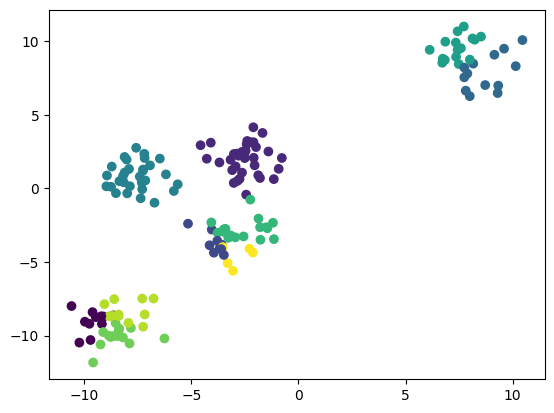

In [38]:
plt.scatter(x_test[:,0],x_test[:,-1], c=ky_pred)

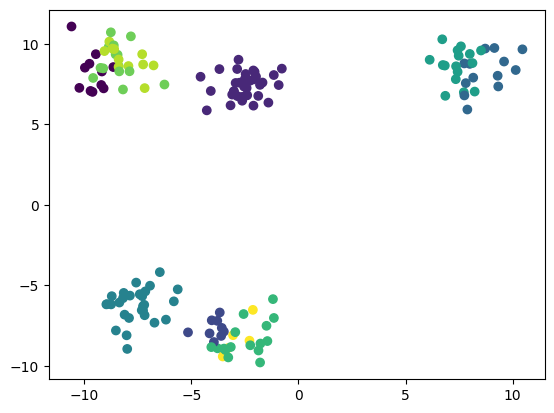

In [45]:
plt.scatter(x_test[:,0],x_test[:,1],c=ky_pred)

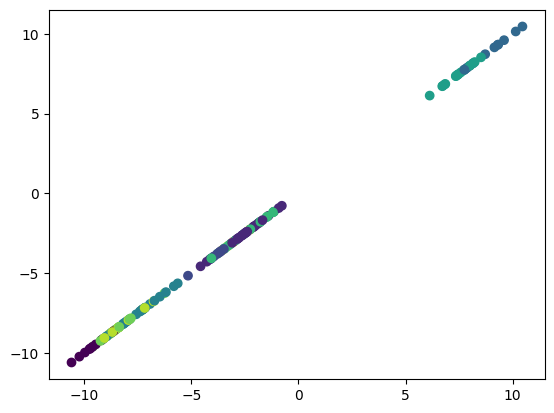

In [51]:
plt.scatter(x_test[:,0],x_test[:,-3],c=ky_pred)